# K近邻算法实现红酒聚类复现与一点自己的

## 对于复现过程中的感受与操作
- 对于实际复现过程中，只是在jupyter中用Anaconda创建的ML环境下用`device = CPU`进行操作(因为**数据量的确比较少一点**)，其次对于下面所说的华为云ModelArts环境，在实际进行注册与创建过程中等不来学生认证，就在这里进行复现即可


- 对于数据嘞，也是跟着网址去到了kaggle中看了看，应该算削微久远的数据也是挺著名的，据说原本有30个数据特征，然后现在只剩13个，原因不得而知。然后呢我是加了一个`df.isnull().sum()`看看数据有没有缺失值，那么其实数据只有178行13列，这个呢点开数据就能看到大概全貌了其实。那么对于数据的基本了解我们当然是执行一般的操作 -- 看看前五行，那么我们先把`data`列表转为`Dataframe`格式，然后用`head()`进行查看


- 然后呢，在数据散点图查看那里，我们加了一个`seaborn`里面的`sns.pairplot(wine_df)`来直接把这些特征之间的散点图全展现出来看看，虽说会跑得久一点，但是我们数据少啊，问题不大。


- 那么对于其中下面实验介绍中说的knn是无监督学习算法，但是knn它不应该是一种有监督学习算法吗，而且他还划分训练集和测试集，虽然来说对于有时为了评估无监督学习算法的性能，或者为了比较不同算法的效果，研究人员可能会使用交叉验证技术来重复地将数据集分为训练集和测试集，并使用不同的训练集和测试集组合来评估算法的性能。但这不是无监督学习算法本身的要求，而是研究人员为了评估和比较算法性能而采取的一种方法，他这个红酒聚类一般来说应该是不需要预测，但是吧，在最后看模型的正确率时候，他的确是通过预测的方法来的，所以就让knn在这个实验中处于两者之中吧，薛定谔的knn


- 有一点想提的就是在其中的划分数据集的代码那里貌似吧训练集和测试集搞反了，这就让后面再看最终结果的时候有一点点奇怪，但是神奇的是，因为这个文件呢我是复制了一份出去先随意发挥，当时发现问题已经被我改了挺久的，但是等我再回来正式书写这份的时候又变好了，很是神奇。


- 到后面构建knn模型，自定义函数算的距离貌似是按照欧氏距离，也是比较符合这个数据集


- 到最后选定k值来确定模型呢，我加了一个图所显示的从4到21之间的Error rate和K value折线图，来对k进行选择，那么最后的结果呢也是符合最初实验的复现选择 -- 当`k=5`时正确率最高也就是错误率最低

## 实验介绍

K近邻算法（K-Nearest-Neighbor, KNN）是一种用于分类和回归的非参数统计方法，是机器学习最基础的算法之一。KNN是无监督学习算法，无需训练，但是每次预测都需要遍历数据集，效率不高。KNN的三个基本要素：

- K值，一个样本的分类是由K个邻居的“多数表决”确定的。K值越小，容易受噪声影响，反之，会使类别之间的界限变得模糊。
- 距离度量，反映了特征空间中两个样本间的相似度，距离越小，越相似。常用的有Lp距离（p=2时，即为欧式距离）、曼哈顿距离、海明距离等。
- 分类决策规则，通常是多数表决，或者基于距离加权的多数表决（权值与距离成反比）。

本实验主要介绍使用MindSpore在部分wine数据集上进行KNN实验。

## 实验目的

- 了解KNN的基本概念；
- 了解如何使用MindSpore进行KNN实验。

## 预备知识

- 熟练使用Python。
- 具备一定的机器学习理论知识，如KNN、无监督学习、Lp距离等。
- 了解华为云的基本使用方法，包括[OBS（对象存储）](https://www.huaweicloud.com/product/obs.html)、[ModelArts（AI开发平台）](https://www.huaweicloud.com/product/modelarts.html)、[训练作业](https://support.huaweicloud.com/engineers-modelarts/modelarts_23_0238.html)等功能。华为云官网：https://www.huaweicloud.com
- 了解并熟悉MindSpore AI计算框架，MindSpore官网：https://www.mindspore.cn/

## 实验环境

- MindSpore 0.5.0（MindSpore版本会定期更新，本指导也会定期刷新，与版本配套）；
- 华为云ModelArts（控制台左上角选择“华北-北京四”）：ModelArts是华为云提供的面向开发者的一站式AI开发平台，集成了昇腾AI处理器资源池，用户可以在该平台下体验MindSpore。

## 实验过程

### 步骤一 数据准备
#### 下载数据

Wine数据集是模式识别最著名的数据集之一，Wine数据集的官网：[Wine Data Set](http://archive.ics.uci.edu/ml/datasets/Wine)。这些数据是对来自意大利同一地区但来自三个不同品种的葡萄酒进行化学分析的结果。数据集分析了三种葡萄酒中每种所含13种成分的量。这些13种属性是

1. Alcohol，酒精
2. Malic acid，苹果酸
3. Ash，灰
4. Alcalinity of ash，灰的碱度
5. Magnesium，镁
6. Total phenols，总酚
7. Flavanoids，类黄酮
8. Nonflavanoid phenols，非黄酮酚
9. Proanthocyanins，原花青素
10. Color intensity，色彩强度
11. Hue，色调
12. OD280/OD315 of diluted wines，稀释酒的OD280/OD315
13. Proline，脯氨酸

- 方式一，从Wine数据集官网下载[wine.data文件](http://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data)。
- 方式二，从华为云OBS中下载[wine.data文件](https://share-course.obs.cn-north-4.myhuaweicloud.com/dataset/wine.data)。

| Key | Value | Key | Value |
| :------------------------- | :------------- | :-------------------- | :--- |
| Data Set Characteristics:  | Multivariate   | Number of Instances:  | 178  |
| Attribute Characteristics: | Integer, Real  | Number of Attributes: | 13   |
| Associated Tasks:          | Classification | Missing Values?       | No   |

#### 上传数据到OBS
将下载好的数据上传到所创建Notebook对应的桶路径下





### 步骤二 数据读取与处理
- #### 导入MindSpore模块和辅助模块
- 在这里的话原本复现是需要用华为的哪个类似于云服务器平台进行操作，但在初步尝试后得加钱，而且在jupyter也不错，于是修改代码context.set_context(device_target="Ascend")为context.set_context(device_target="CPU")，使用电脑cpu即可(因为数据量较少只有178×13)

In [30]:
import os
# os.environ['DEVICE_ID'] = '4'
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import mindspore as ms
from mindspore import context
from mindspore import nn
from mindspore.ops import operations as P
from mindspore.ops import functional as F

from pylab import mpl
# 设置显示中文字体
mpl.rcParams["font.sans-serif"] = ["SimHei"]

# 设置正常显示符号
mpl.rcParams["axes.unicode_minus"] = False


# context.set_context(device_target="Ascend")
context.set_context(device_target="CPU")

- #### 读取Wine数据集`wine.data`，并查看部分数据。
- 数据集中是纯纯数字并且根据前面官网已写以及查阅，很幸运的数据并无缺失，那么对于数据的缺失而做特征工程就可以免去，至于其中的数据是否有异常值，离群之类的在复现中不做操作，在后续改进中我会将数据改为csv格式，以便进行更多的数据可视化与特征工程操作。

In [31]:
with open('wine.data') as csv_file:
    data = list(csv.reader(csv_file, delimiter=','))
print(data[56:62]+data[130:133]) # 打印部分数据

[['1', '14.22', '1.7', '2.3', '16.3', '118', '3.2', '3', '.26', '2.03', '6.38', '.94', '3.31', '970'], ['1', '13.29', '1.97', '2.68', '16.8', '102', '3', '3.23', '.31', '1.66', '6', '1.07', '2.84', '1270'], ['1', '13.72', '1.43', '2.5', '16.7', '108', '3.4', '3.67', '.19', '2.04', '6.8', '.89', '2.87', '1285'], ['2', '12.37', '.94', '1.36', '10.6', '88', '1.98', '.57', '.28', '.42', '1.95', '1.05', '1.82', '520'], ['2', '12.33', '1.1', '2.28', '16', '101', '2.05', '1.09', '.63', '.41', '3.27', '1.25', '1.67', '680'], ['2', '12.64', '1.36', '2.02', '16.8', '100', '2.02', '1.41', '.53', '.62', '5.75', '.98', '1.59', '450'], ['3', '12.86', '1.35', '2.32', '18', '122', '1.51', '1.25', '.21', '.94', '4.1', '.76', '1.29', '630'], ['3', '12.88', '2.99', '2.4', '20', '104', '1.3', '1.22', '.24', '.83', '5.4', '.74', '1.42', '530'], ['3', '12.81', '2.31', '2.4', '24', '98', '1.15', '1.09', '.27', '.83', '5.7', '.66', '1.36', '560']]


- 在这里我们是加了一个用df.isnull().sum()看看数据有无缺失值
- 再用df.head看看前几行数据，了解一下基本情况，因为上面那个看起来多少有点费眼睛呢

In [32]:
# 将列表转换为DataFrame
df = pd.DataFrame(data)

# 检查DataFrame中是否有缺失值
missing_values = df.isnull().sum()
print(missing_values)
df.head(5)

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
dtype: int64


,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.8,3.06,.28,2.29,5.64,1.04,3.92,1065
1,1,13.2,1.78,2.14,11.2,100,2.65,2.76,.26,1.28,4.38,1.05,3.4,1050
2,1,13.16,2.36,2.67,18.6,101,2.8,3.24,.3,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.5,16.8,113,3.85,3.49,.24,2.18,7.8,.86,3.45,1480
4,1,13.24,2.59,2.87,21,118,2.8,2.69,.39,1.82,4.32,1.04,2.93,735


- 对于实验中的数据查看可以看到数据有整数也有浮点数，同时在步骤一中有说明数据集分析了三种葡萄酒中每种所含13种成分的量，那么每个数据集最前面的1，2，3即为其中的三类

#### 取三类样本（共178条），将数据集的13个属性作为自变量$X$。将数据集的3个类别作为因变量$Y$。
- 同时因为观察到数据既有整数也有浮点数，在这里将特征数据均转为浮点数，方便后续操作。

In [33]:
X = np.array([[float(x) for x in s[1:]] for s in data[:178]], np.float32)
Y = np.array([s[0] for s in data[:178]], np.int32)

#### 取样本的某两个属性进行2维可视化，可以看到在某两个属性上样本的分布情况以及可分性。
在第一张图中，不同类别的葡萄酒在“Malic acid”和“Alcohol”这两个维度上的分布显示出了它们在酸度和酒精含量上的相似性和差异性。
第二张图揭示了不同类别的葡萄酒在“Ash”和“Alkalinity of ash”这两个维度上的分布，表明它们在灰分碱度上有显著差异。
第三张图展示了“Magnesium”和“Total phenols”之间的关系，暗示了高镁含量的葡萄酒通常具有较高的总酚水平。
第四张图显示了“Flavanoids”和“Nonflavonoid phenols”之间的关系，表明高黄酮类化合物的葡萄酒通常含有较低的非黄酮类酚类化合物。

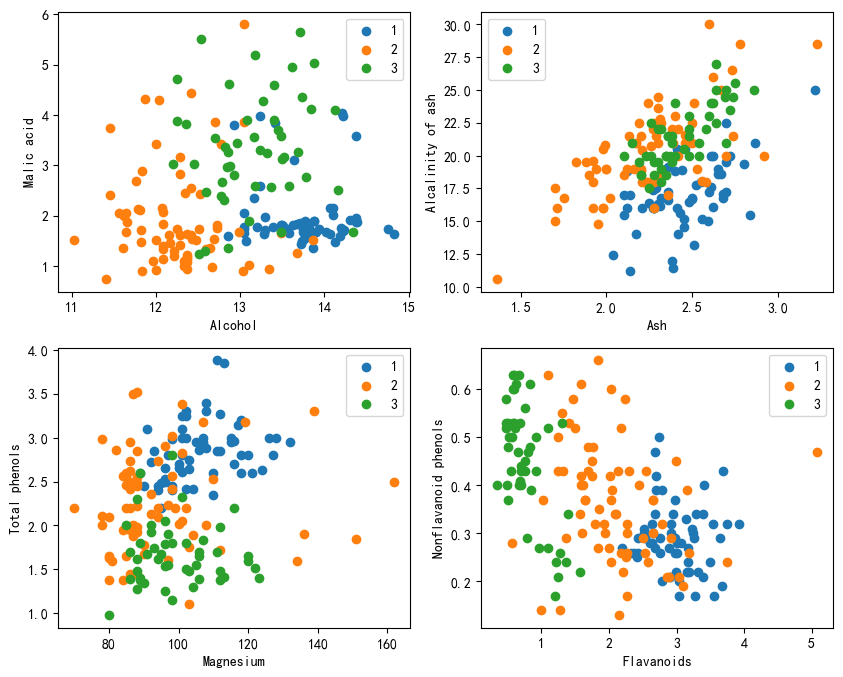

In [34]:
attrs = ['Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 'Total phenols',
         'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue',
         'OD280/OD315 of diluted wines', 'Proline']
plt.figure(figsize=(10, 8))
for i in range(0, 4):
    plt.subplot(2, 2, i+1)
    a1, a2 = 2 * i, 2 * i + 1
    plt.scatter(X[:59, a1], X[:59, a2], label='1')
    plt.scatter(X[59:130, a1], X[59:130, a2], label='2')
    plt.scatter(X[130:, a1], X[130:, a2], label='3')
    plt.xlabel(attrs[a1])
    plt.ylabel(attrs[a2])
    plt.legend()
plt.show()


- 在这里呢，我们也使用到了Seaborn的pairplot函数来创建一个.pairplot，展示DataFrame中所有变量之间的关系
- 警告我们函数过时的呢，我们先都忽略处理啊

<Figure size 1000x600 with 0 Axes>

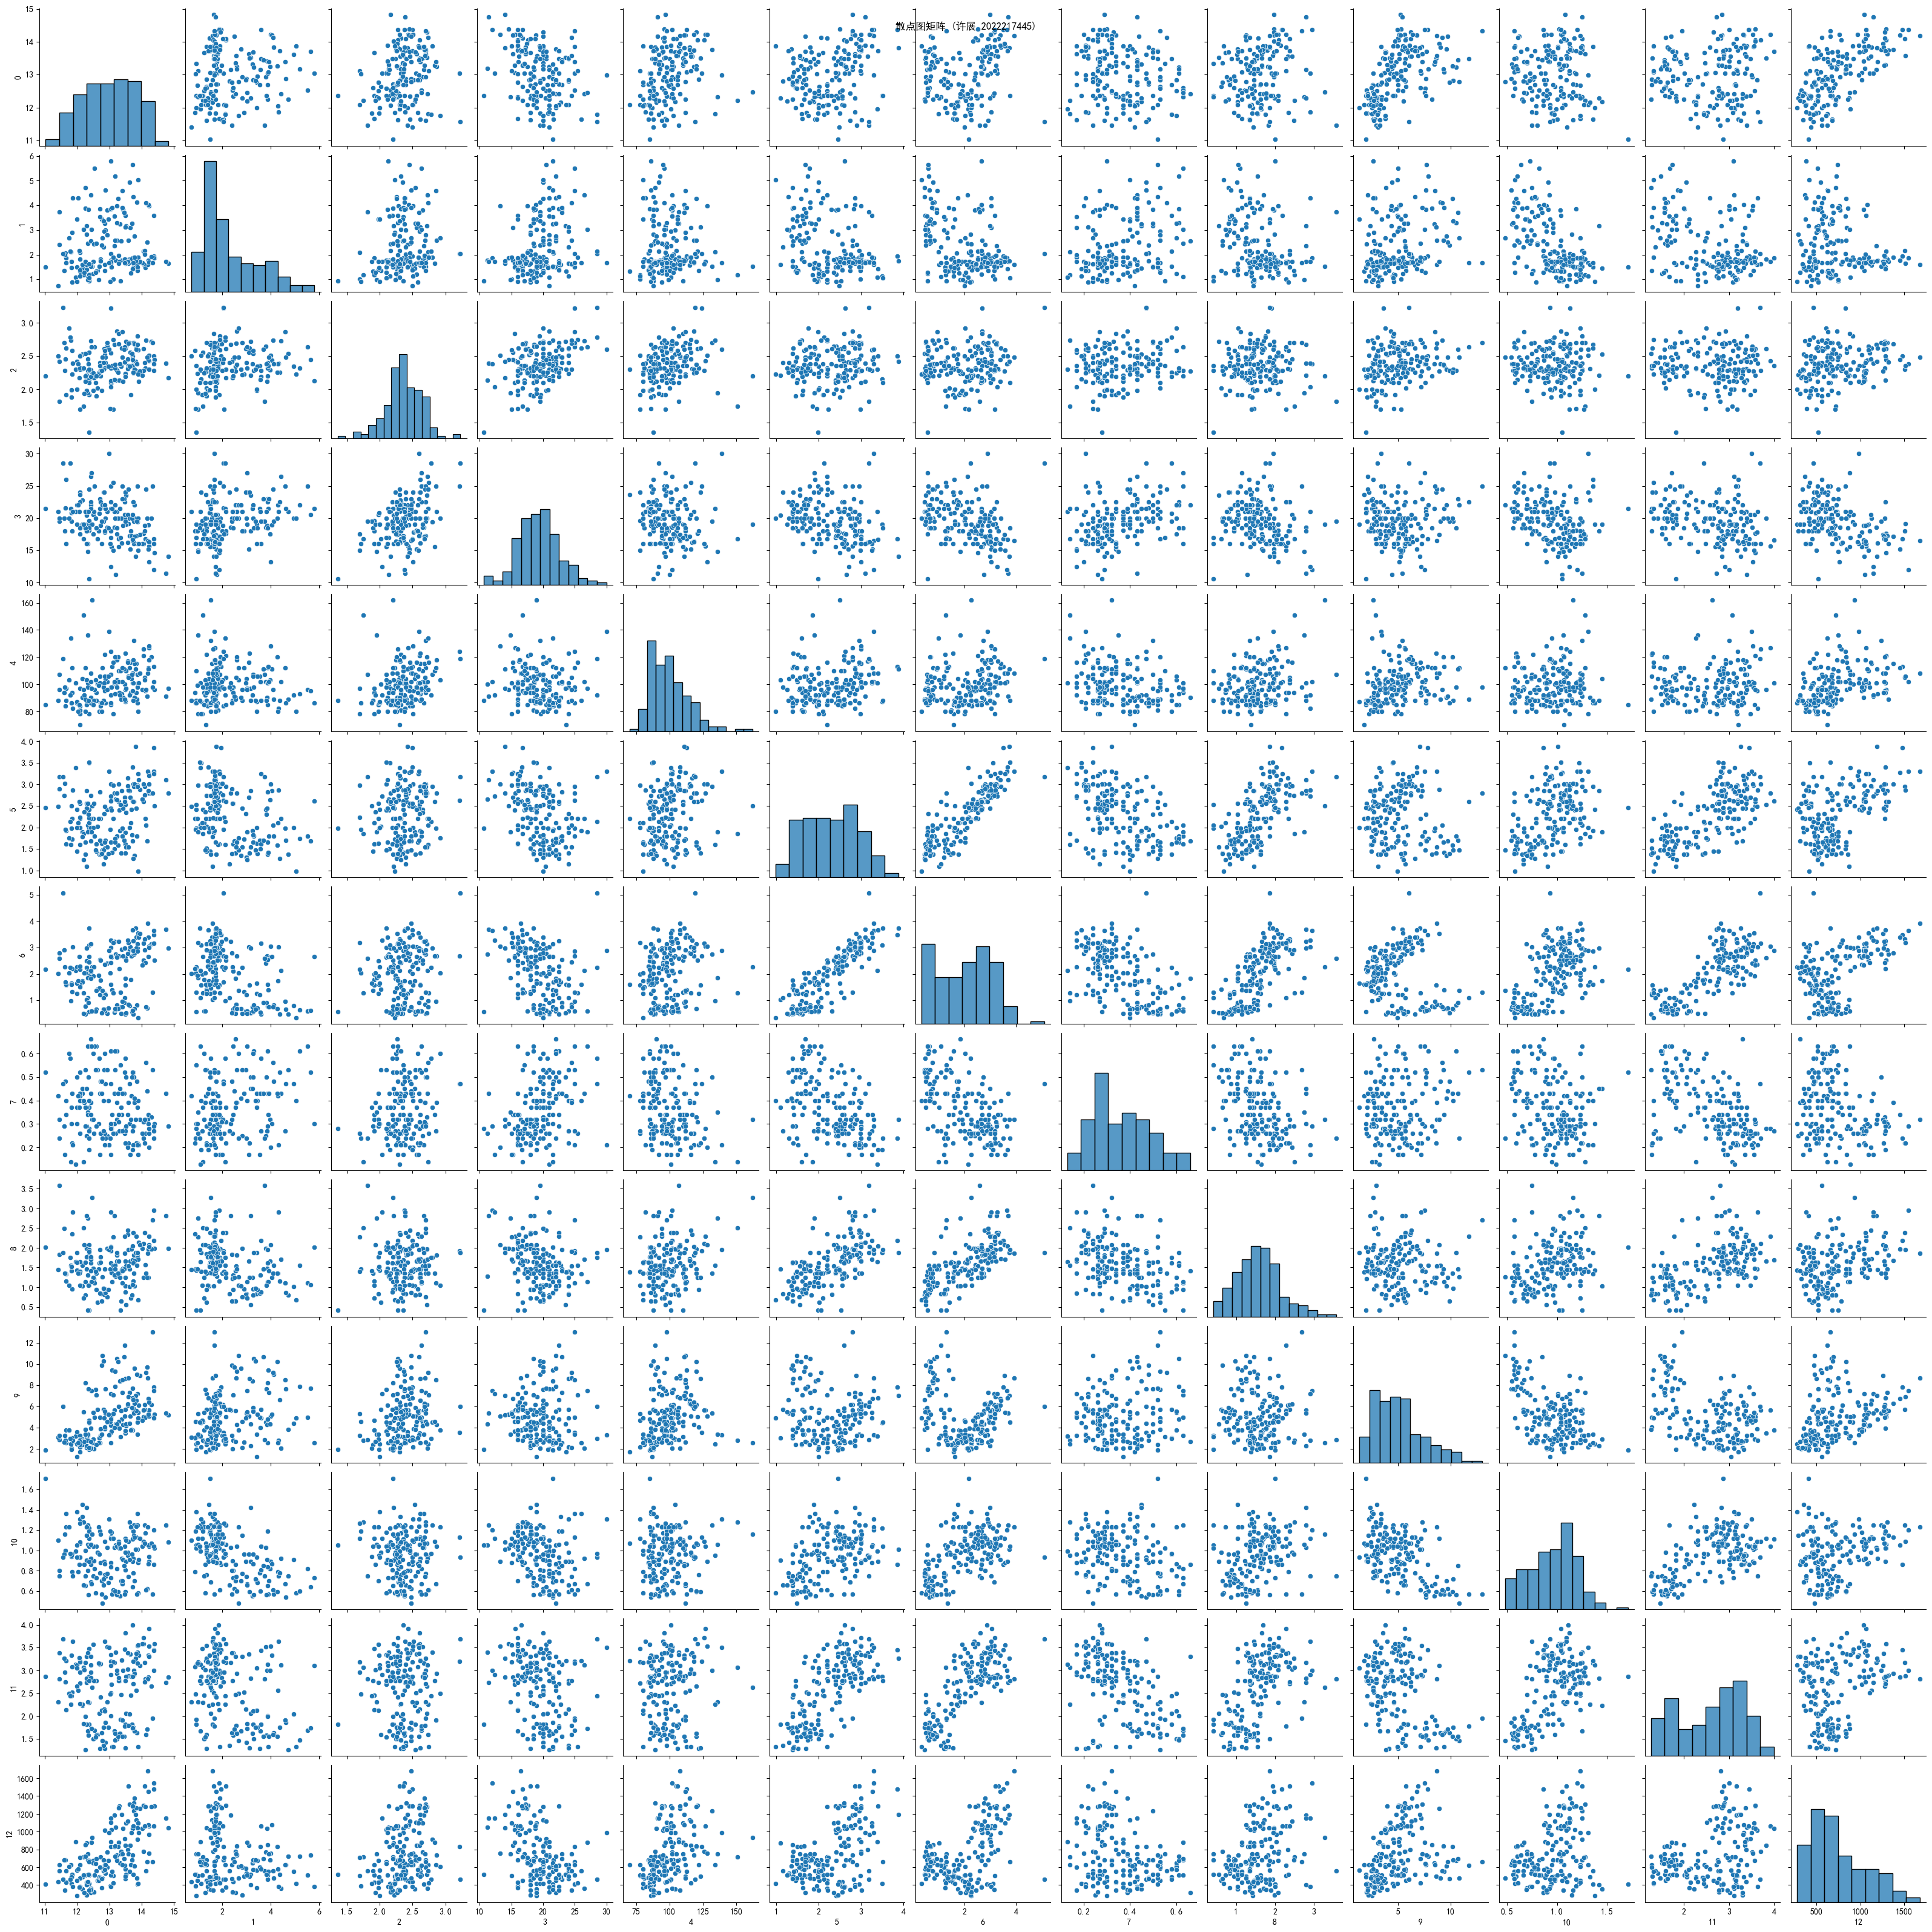

In [35]:
import seaborn as sns
#部分警告忽略
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

wine_df = pd.DataFrame(X)
plt.figure(figsize=(10, 6))
sns.pairplot(wine_df)
plt.suptitle('散点图矩阵 (许展 2022217445)') 
plt.show()

#### 将数据集按128:50划分为训练集（已知类别样本）和验证集（待验证样本）：
这里面对代码的处理，嗯，他写错了吧应该，他原本写的代码里面是train_idx = np.random.choice(178, 50, replace=False)，把测试集和训练集搞反了

In [36]:
train_idx = np.random.choice(178, 128, replace=False)
test_idx = np.array(list(set(range(178)) - set(train_idx)))
X_train, Y_train = X[train_idx], Y[train_idx]
X_test, Y_test = X[test_idx], Y[test_idx]

### 步骤三 计算距离
利用MindSpore提供的`tile, suqare, ReduceSum, sqrt, TopK`等算子，通过矩阵运算的方式同时计算输入样本x和已明确分类的其他样本X_train的距离，并计算出top k近邻，这里面使用的貌似是欧式近邻，后续可以考虑进行是否修改结合数据表现呈现。

In [37]:
class KnnNet(nn.Cell):
    def __init__(self, k):
        super(KnnNet, self).__init__()
        self.tile = P.Tile()
        self.sum = P.ReduceSum()
        self.topk = P.TopK()
        self.k = k

    def construct(self, x, X_train):
        # Tile input x to match the number of samples in X_train
        x_tile = self.tile(x, (128, 1))
        square_diff = F.square(x_tile - X_train)
        square_dist = self.sum(square_diff, 1)
        dist = F.sqrt(square_dist)
        # -dist mean the bigger the value is, the nearer the samples are
        values, indices = self.topk(-dist, self.k)
        return indices


def knn(knn_net, x, X_train, Y_train):
    x, X_train = ms.Tensor(x), ms.Tensor(X_train)
    indices = knn_net(x, X_train)
    topk_cls = [0]*len(indices.asnumpy())
    for idx in indices.asnumpy():
        topk_cls[Y_train[idx]] += 1
    cls = np.argmax(topk_cls)
    return cls

Validation accuracy is 0.680000
Validation accuracy is 0.660000
Validation accuracy is 0.660000
Validation accuracy is 0.680000
Validation accuracy is 0.680000
Validation accuracy is 0.680000
Validation accuracy is 0.680000
Validation accuracy is 0.680000
Validation accuracy is 0.680000
Validation accuracy is 0.660000
Validation accuracy is 0.660000
Validation accuracy is 0.660000
Validation accuracy is 0.660000
Validation accuracy is 0.660000
Validation accuracy is 0.700000
Validation accuracy is 0.680000
Validation accuracy is 0.680000


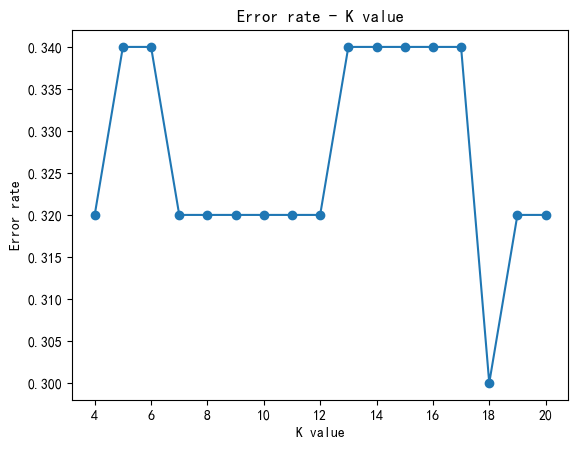

In [38]:
# 定义一个列表，包含从4到20的整数
k_values = list(range(4, 21))

# 创建一个空列表，用于存储每个k值对应的错误率
error_rates = []

# 遍历k_values中的每个k值
for k in k_values:
    # 创建一个KnnNet实例，其中k是邻居的数量
    knn_net = KnnNet(k)
    
    # 初始化验证准确率为0
    acc = 0
    
    # 遍历测试集X_test和Y_test
    for x, y in zip(X_test, Y_test):
        # 调用knn函数来预测x的类别
        pred = knn(knn_net, x, X_train, Y_train)
        
        # 如果预测正确，则增加验证准确率
        if pred == y:
            acc += 1
            
    # 计算当前k值的错误率
    error_rate = 1 - acc / len(Y_test)
    
    # 将错误率添加到error_rates列表中
    error_rates.append(error_rate)
    
    # 打印当前k值的验证准确率
    print('Validation accuracy is %f' % (acc/len(Y_test)))

# 使用matplotlib绘制k值和错误率的折线图
plt.plot(k_values, error_rates, marker='o')
plt.xlabel('K value')  # 设置x轴标签
plt.ylabel('Error rate')  # 设置y轴标签
plt.title('Error rate - K value')  # 设置图表标题
plt.show()  # 显示图表


- 这里最初是想要用k折交叉验证来选出最优k值，顺便画出error rate - k accuracy图像的，但是嗯考虑后用了简单的操作，直接对k增值操作在经过修改后又会报访问下标越界，然后就是两者轮流报错，其中原因一部分貌似是因为其中mindspore中的BroadCast操作，另一方面可能就是因为处理不当，对于mindspore中一些了解不足，而在最终按照报错提示修改，图形如上，感觉会有点奇怪嗯。
- 那么正如我们上图所显示的从4到21之间的Error rate和K value折线图，当k = 5时，错误率最小，正是我们的选择


### 步骤四 预测
在验证集上验证KNN算法的有效性，取$k = 5$，验证精度接近80%，说明KNN算法在该3分类任务上有效，能根据酒的13种属性判断出酒的品种。

符合上图

In [39]:
acc = 0
knn_net = KnnNet(5)

for x, y in zip(X_test, Y_test):
    pred = knn(knn_net, x, X_train, Y_train)
    acc += (pred == y)
    print('label: %d, prediction: %s' % (y, pred))
print('Validation accuracy is %f' % (acc/len(Y_test)))

label: 1, prediction: 1
label: 2, prediction: 3
label: 3, prediction: 3
label: 3, prediction: 3
label: 1, prediction: 1
label: 1, prediction: 1
label: 3, prediction: 1
label: 1, prediction: 1
label: 3, prediction: 3
label: 3, prediction: 1
label: 1, prediction: 1
label: 3, prediction: 3
label: 3, prediction: 3
label: 1, prediction: 1
label: 1, prediction: 1
label: 3, prediction: 2
label: 3, prediction: 3
label: 3, prediction: 2
label: 3, prediction: 1
label: 1, prediction: 3
label: 1, prediction: 1
label: 1, prediction: 1
label: 3, prediction: 1
label: 3, prediction: 1
label: 3, prediction: 2
label: 1, prediction: 1
label: 1, prediction: 1
label: 1, prediction: 1
label: 1, prediction: 1
label: 1, prediction: 1
label: 2, prediction: 2
label: 2, prediction: 1
label: 2, prediction: 2
label: 2, prediction: 2
label: 2, prediction: 2
label: 2, prediction: 2
label: 2, prediction: 3
label: 2, prediction: 3
label: 2, prediction: 2
label: 2, prediction: 2
label: 2, prediction: 2
label: 2, predic

## 实验小结
本实验使用MindSpore实现了KNN算法，用来解决3分类问题。取wine数据集上的3类样本，分为已知类别样本和待验证样本，从验证结果可以看出KNN算法在该任务上有效，能根据酒的13种属性判断出酒的品种。
